<a href="https://colab.research.google.com/github/Mohammad-Amirifard/Time-Series-Forecasting/blob/main/Notebooks/Part1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Project Detail

**Problem:** Time Series Forecasting

**Goal:** The task is to develop a forecasting model that is able to predict several uncorrelated time series. The prerequisite is that the model exhibits generalisation capabilities in the forecasting domain, allowing it to transcend the constraints of specific time domains. This requires a model that, while specialised in forecasting, is not limited to predicting in a single or predefined time context.

**Dataset Detail:**


1.   Time series length: the length of the time series in the training dataset is variable. To simplify the portability of the dataset, we padded with zeros the sequences to the maximum length of 2776. Thus, the dataset is provided in a compact form as a Nx2776 array. We provide an additional 'valid_periods.npy' file containing the information to recover the original time series without the padding
2.   File Format: npy

3.   Categories: the provided time series are composed by sequences collected from 6 different sources. We further provide additional information about the category of each time series.


**Datas Structure:** Single folder containing the following files:
1. 'training_data.npy': it contains a numpy array of shape (48000, 2776). 48000 time series of length 2776.
2. 'valid_periods.npy': it contains a numpy array of type (48000, 2) containing for each of the time series the start and end index of the current series, i.e. the part without padding.
3. 'categories.npy': it contains a numpy array of shape (48000,), containing for each of the time series the code of its category. The possible categories are in {'A', 'B', 'C', 'D', 'E', 'F'}.
`IMPORTANT:` This is a dataset consisting of monovariate time series, i.e. composed of a single feature, belonging to six different domains. The time series of each domain are not to be understood as closely related to each other, but only as collected from similar data sources.
What is required of you is therefore to build a model that is capable of generalising sufficiently to predict the future samples of the 60 time series of the test set. To download `**datset**`, click on the link below: [link](https://drive.google.com/drive/folders/1LntbkzHK04CtRrXl8s9U62FH6V2VFkce?usp=sharing) and for `**github repositoy**` please click on this: [Link](https://github.com/Mohammad-Amirifard/Time-Series-Forecasting)

**Notebook 1:** In this notebook we are trying to do the first analyses on datas. Notebook 2 is dedicated for model choesed based on problem.

###1- Connect Colab to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive') # mount google drive to /content directory. You can see your drive on the left pannel.

Mounted at /content/drive


In [2]:
# Copy  Project to /content direcory. Please replace project_directory with yours.
project_directory = "/content/drive/MyDrive/Projects/Time_Series"
%cp -r {project_directory} /content

cp: cannot open '/content/drive/MyDrive/Projects/Time_Series/NoteBooks/Access To Github and save changes.gdoc' for reading: Operation not supported
cp: cannot open '/content/drive/MyDrive/Projects/Time_Series/Meeting Reports/EDA Part.gdoc' for reading: Operation not supported


###2- Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###3- Load data

In [4]:
# Unzip dataset to /content direcory. Please replace the dataset_dir with yours in you drive.
!unzip -qq '/content/Time_Series/Dataset/training_dataset.zip' -d '/content'

In [5]:
categories = np.load('/content/categories.npy')
training_data = np.load('/content/training_data.npy')
valid_periods = np.load('/content/valid_periods.npy')

### 4- EDA

In [6]:
print(f'training_data.shape: {training_data.shape}')
print(f'categories.shape: {categories.shape}')
print(f'valid_periods.shape: {valid_periods.shape}')

training_data.shape: (48000, 2776)
categories.shape: (48000,)
valid_periods.shape: (48000, 2)


In [7]:
# Create Dataframe for each for better view
trainin_data_df = pd.DataFrame(training_data)
categories_df = pd.DataFrame(categories,columns=['Category'])
valid_periods_df = pd.DataFrame(valid_periods,columns=['Start index','End index'])

In [8]:
trainin_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.478704,0.412963,0.501852,0.756481,0.744444,0.640741,0.516667,0.602778,0.367593,0.331481
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.628000,0.624000,0.644000,0.688000,0.740000,0.640000,0.536000,0.600000,0.460000,0.396000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.959741,0.949098,0.919297,0.916705,0.901249,0.932531,0.955206,0.960481,0.946506,0.977140
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.411765,0.307030,0.325681,0.361549,0.430416,0.486370,0.450502,0.470588,0.569584,0.571019
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.340909,0.522727,0.568182,0.772727,0.681818,0.704545,0.863636,0.727273,0.818182,0.840909


In [9]:
categories_df.head()

,Category
0,D
1,D
2,D
3,D
4,D


In [10]:
valid_periods_df.head()

,Start index,End index
0,2325,2776
1,2325,2776
2,2325,2776
3,2712,2776
4,2682,2776


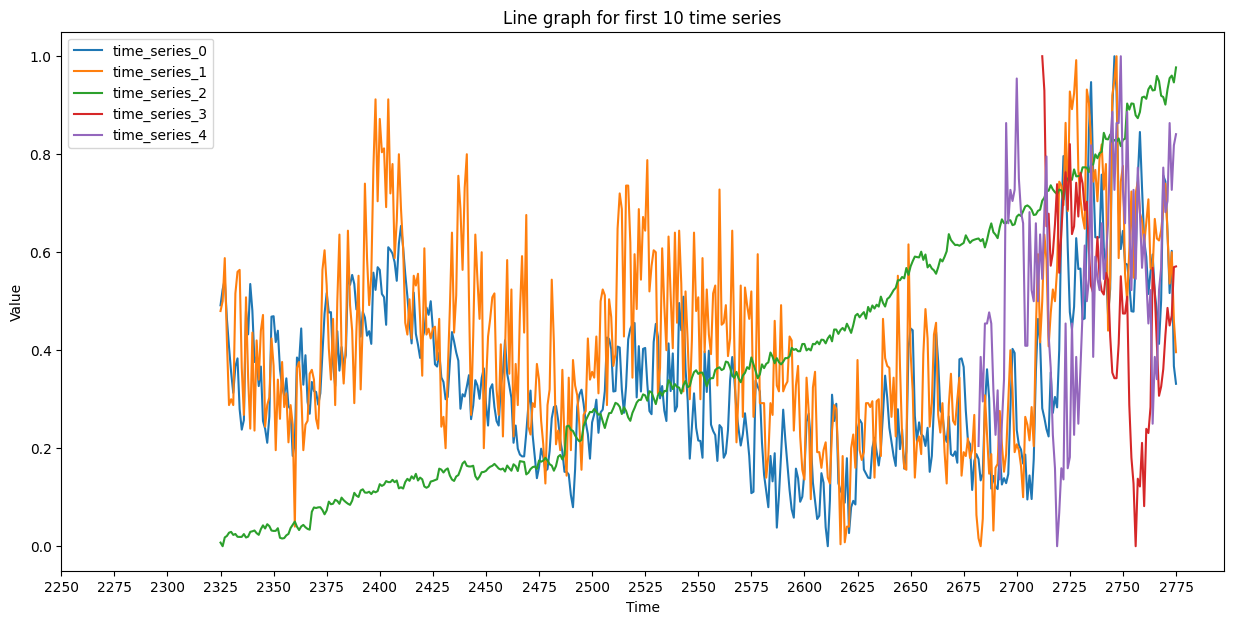

In [12]:
# Here we show just only 5 time series together.
figure = plt.figure(figsize=(15,7))

for i in range(5):

  # Find start and end points of ith time series from valid_perods_df
  start_point = valid_periods_df.iloc[i,0]
  end_point = valid_periods_df.iloc[i,1]
  sns.lineplot(x=np.arange(start_point,end_point), y=trainin_data_df.iloc[i,start_point:end_point], label=f'time_series_{i}')


plt.xticks(range(2250,2800,25))
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title(f'Line graph for first 5 time series')
plt.show()